## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import zipfile

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

In [2]:
shipping_data_clean = pd.read_csv("Cleaned_Shipping_Details.csv")
shipping_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6495 non-null   int64  
 1   Artist Reputation      6495 non-null   float64
 2   Height                 6495 non-null   float64
 3   Width                  6495 non-null   float64
 4   Weight                 6495 non-null   float64
 5   Material               6495 non-null   object 
 6   Price Of Sculpture     6495 non-null   float64
 7   Base Shipping Price    6495 non-null   float64
 8   International          6495 non-null   object 
 9   Express Shipment       6495 non-null   object 
 10  Installation Included  6495 non-null   object 
 11  Transport              6495 non-null   object 
 12  Fragile                6495 non-null   object 
 13  Customer Information   6495 non-null   object 
 14  Remote Location        6495 non-null   object 
 15  Cost

In [3]:
shipping_data_clean.drop(columns=shipping_data_clean.columns[0], axis=1,  inplace=True)

In [4]:
categoricals = list(shipping_data_clean.select_dtypes(['object']).columns)
numericals = [x for x in shipping_data_clean.columns if x not in categoricals]
numericals.remove('scheduled_year')
numericals.remove('scheduled_month')
numericals.remove('scheduled_day')
numericals.remove('delivery_year')
numericals.remove('delivery_month')
numericals.remove('delivery_day')
numericals.remove('delivery_dateofmonth')
numericals.remove('delta')

In [5]:
shipping_data_clean.describe().T

count           mean           std      min       25%  \
Artist Reputation      6495.0       0.460234  2.499963e-01     0.00     0.270   
Height                 6495.0      21.652656  1.161719e+01     3.00    13.000   
Width                  6495.0       9.461586  5.174982e+00     2.00     6.000   
Weight                 6495.0  358742.941416  2.523480e+06     3.00   551.000   
Price Of Sculpture     6495.0    1143.329810  8.597637e+03     3.00     5.230   
Base Shipping Price    6495.0      37.397477  2.687443e+01    10.00    16.700   
Cost                   6495.0   13571.699313  1.258482e+05    86.07   226.775   
scheduled_year         6495.0    2016.837105  1.349791e+00  2015.00  2016.000   
scheduled_month        6495.0       6.230023  3.388515e+00     1.00     3.000   
scheduled_day          6495.0       2.986297  1.996755e+00     0.00     1.000   
scheduled_dateofmonth  6495.0      15.587221  8.731039e+00     1.00     8.000   
delivery_year          6495.0    2016.837413  1.349258e+00  2015.00  2016.000   
delivery_month         6495.0       6.224326  3.390328e+00     1.00     3.000   
delivery_day           6495.0       3.000000  1.996455e+00     0.00     1.000   
delivery_dateofmonth   6495.0      15.602771  8.719945e+00     1.00     8.000   
delta                  6495.0      -0.042340  2.428952e+00    -4.00    -2.000   

                           50%        75%           max  
Artist Reputation         0.45      0.640  1.000000e+00  
Height                   20.00     29.000  7.300000e+01  
Width                     8.00     11.000  5.000000e+01  
Weight                 3232.00  35423.000  1.179279e+08  
Price Of Sculpture        8.02     88.635  3.823857e+05  
Base Shipping Price      23.49     57.910  9.998000e+01  
Cost                    457.84   1362.920  3.792938e+06  
scheduled_year         2017.00   2018.000  2.019000e+03  
scheduled_month           6.00      9.000  1.200000e+01  
scheduled_day             3.00      5.000  6.000000e+00  
scheduled_dateofmonth    15.00     23.000  3.100000e+01  
delivery_year          2017.00   2018.000  2.019000e+03  
delivery_month            6.00      9.000  1.200000e+01  
delivery_day              3.00      5.000  6.000000e+00  
delivery_dateofmonth     15.00     23.000  3.100000e+01  
delta                     0.00      2.000  4.000000e+00

- Most sculptures are having 21ft height and 9ft width i.e., rectangular in shape.
- Cost of the shipment order are ranging from 86 to 3792938 dollars whereas their shipping costs are ranging from 10 to 99.98 dollars
- This dataset ranges from time period 2015 to 2019. Most shipments were scheduled and delivered on Wednesday, during mid month. June is when most sculpture shipments happens.

#### Correlation Plot

Correlation plot helps us find out what are factors that are cost of the order.

Text(0.5, 1.0, 'Heat Map')

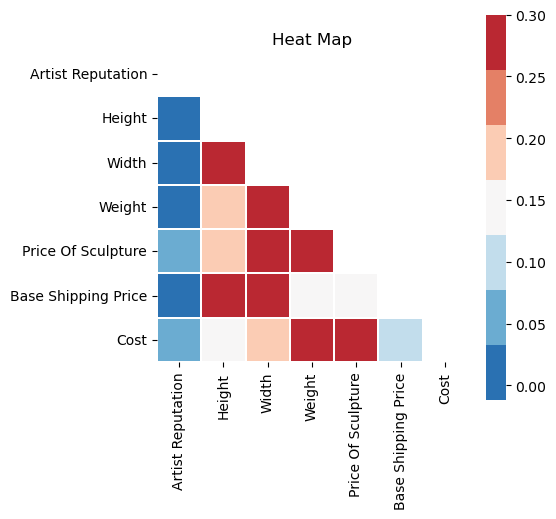

In [6]:
sub_data = shipping_data_clean[['Artist Reputation','Height','Width','Weight','Price Of Sculpture','Base Shipping Price','Cost']]

f, ax = plt.subplots(figsize=(5, 5))
mask = np.zeros_like(sub_data.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(sub_data.corr(), mask=mask, vmax=.3, linewidth=0.1, square=True, cmap=sns.color_palette("RdBu_r", 7));
ax.set_title("Heat Map")

- Weight and price of sculpture have highest impact on the Cost of the shipment order.
- It is evident that the width and height of sculptures are highly co-related
- Base shipping price is highly correlated to width and height. This might indicate base shipping price is charged according to size of the sculpture
- Price of sculpture is highly co-related to width and weight. High width tends to be a heavier sculpture as it needs a large base to ensure the sculpture is stable.

#### Visualize shipping cost by state

In [7]:
# generate median shipping cost for each state
state_median_cost = shipping_data_clean.groupby('state', as_index=False).median()[['state','Cost']]
state_median_cost.sort_values(by='Cost', ascending = False).head()

state     Cost
20    MD  651.770
17    KY  605.305
44    UT  599.030
30    NH  596.280
50    WY  593.495

In [8]:
fig = px.choropleth(state_median_cost,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Cost',
                    color_continuous_scale="Viridis_r", 
                    )
fig.update_layout(
      title_text = 'US state by median shipping cost',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

- Kentucky has the highest median shipping cost for shipments to Maryland. They cost more than 600 bucks. Wyoming, Utah, and New Hampshire are next. They cost more than 500 but less than 600. 
- Based on the analysis, it was unable to determine which states or their geographic regions were to blame for the high shipping costs. 
- It's possible that clients from these states choose to buy sculptures that are heavier and more expensive. Or perhaps these states simply require more expensive shipping. For the purpose of this inquiry, let's group the states based on median weight and sculptural cost.



   What is surprising is that despite purchasing the heaviest and most expensive sculptures, consumers in LA (Louisiana) do not pay among the highest delivery costs. That can imply that the exploratory data analysis did not reveal all the elements affecting shipping charges. The other elements that contribute to the high shipping costs to Kentucky, Utah, Wyoming, and New Hampshire may be revealed using a prediction model.

#### Distribution and Probability Plots

In [9]:
def dist_plots(df, list_of_columns):
    nrows = len(list_of_columns)
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize=(15, nrows*3.5))
    ax = ax.ravel()
    for i, col in enumerate(list_of_columns):
        sns.distplot(df[col], ax = ax[i*3-3], fit = stats.norm)
        ax[i*3-3].set_title(f'{col} distribution plot',fontsize=14)
        ax[i*3-3].tick_params(labelsize=12)
        ax[i*3-3].set_xlabel(col, fontsize=14)
        
        sns.boxplot(df[col], width = 0.2, ax = ax[i*3-2])
        ax[i*3-2].set_title(f'{col} box plot',fontsize=14)
        ax[i*3-2].tick_params(labelsize=12)
        ax[i*3-2].set_xlabel(col, fontsize=14)
        
        stats.probplot(df[col], plot = ax[i*3-1])
        ax[i*3-1].set_title(f'{col} probability plot', fontsize=14)
        ax[i*3-1].tick_params(labelsize=12)
        ax[i*3-1].set_xlabel(col, fontsize=14)
    plt.tight_layout()

/Users/mahendra_g_p/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/mahendra_g_p/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/mahendra_g_p/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogr

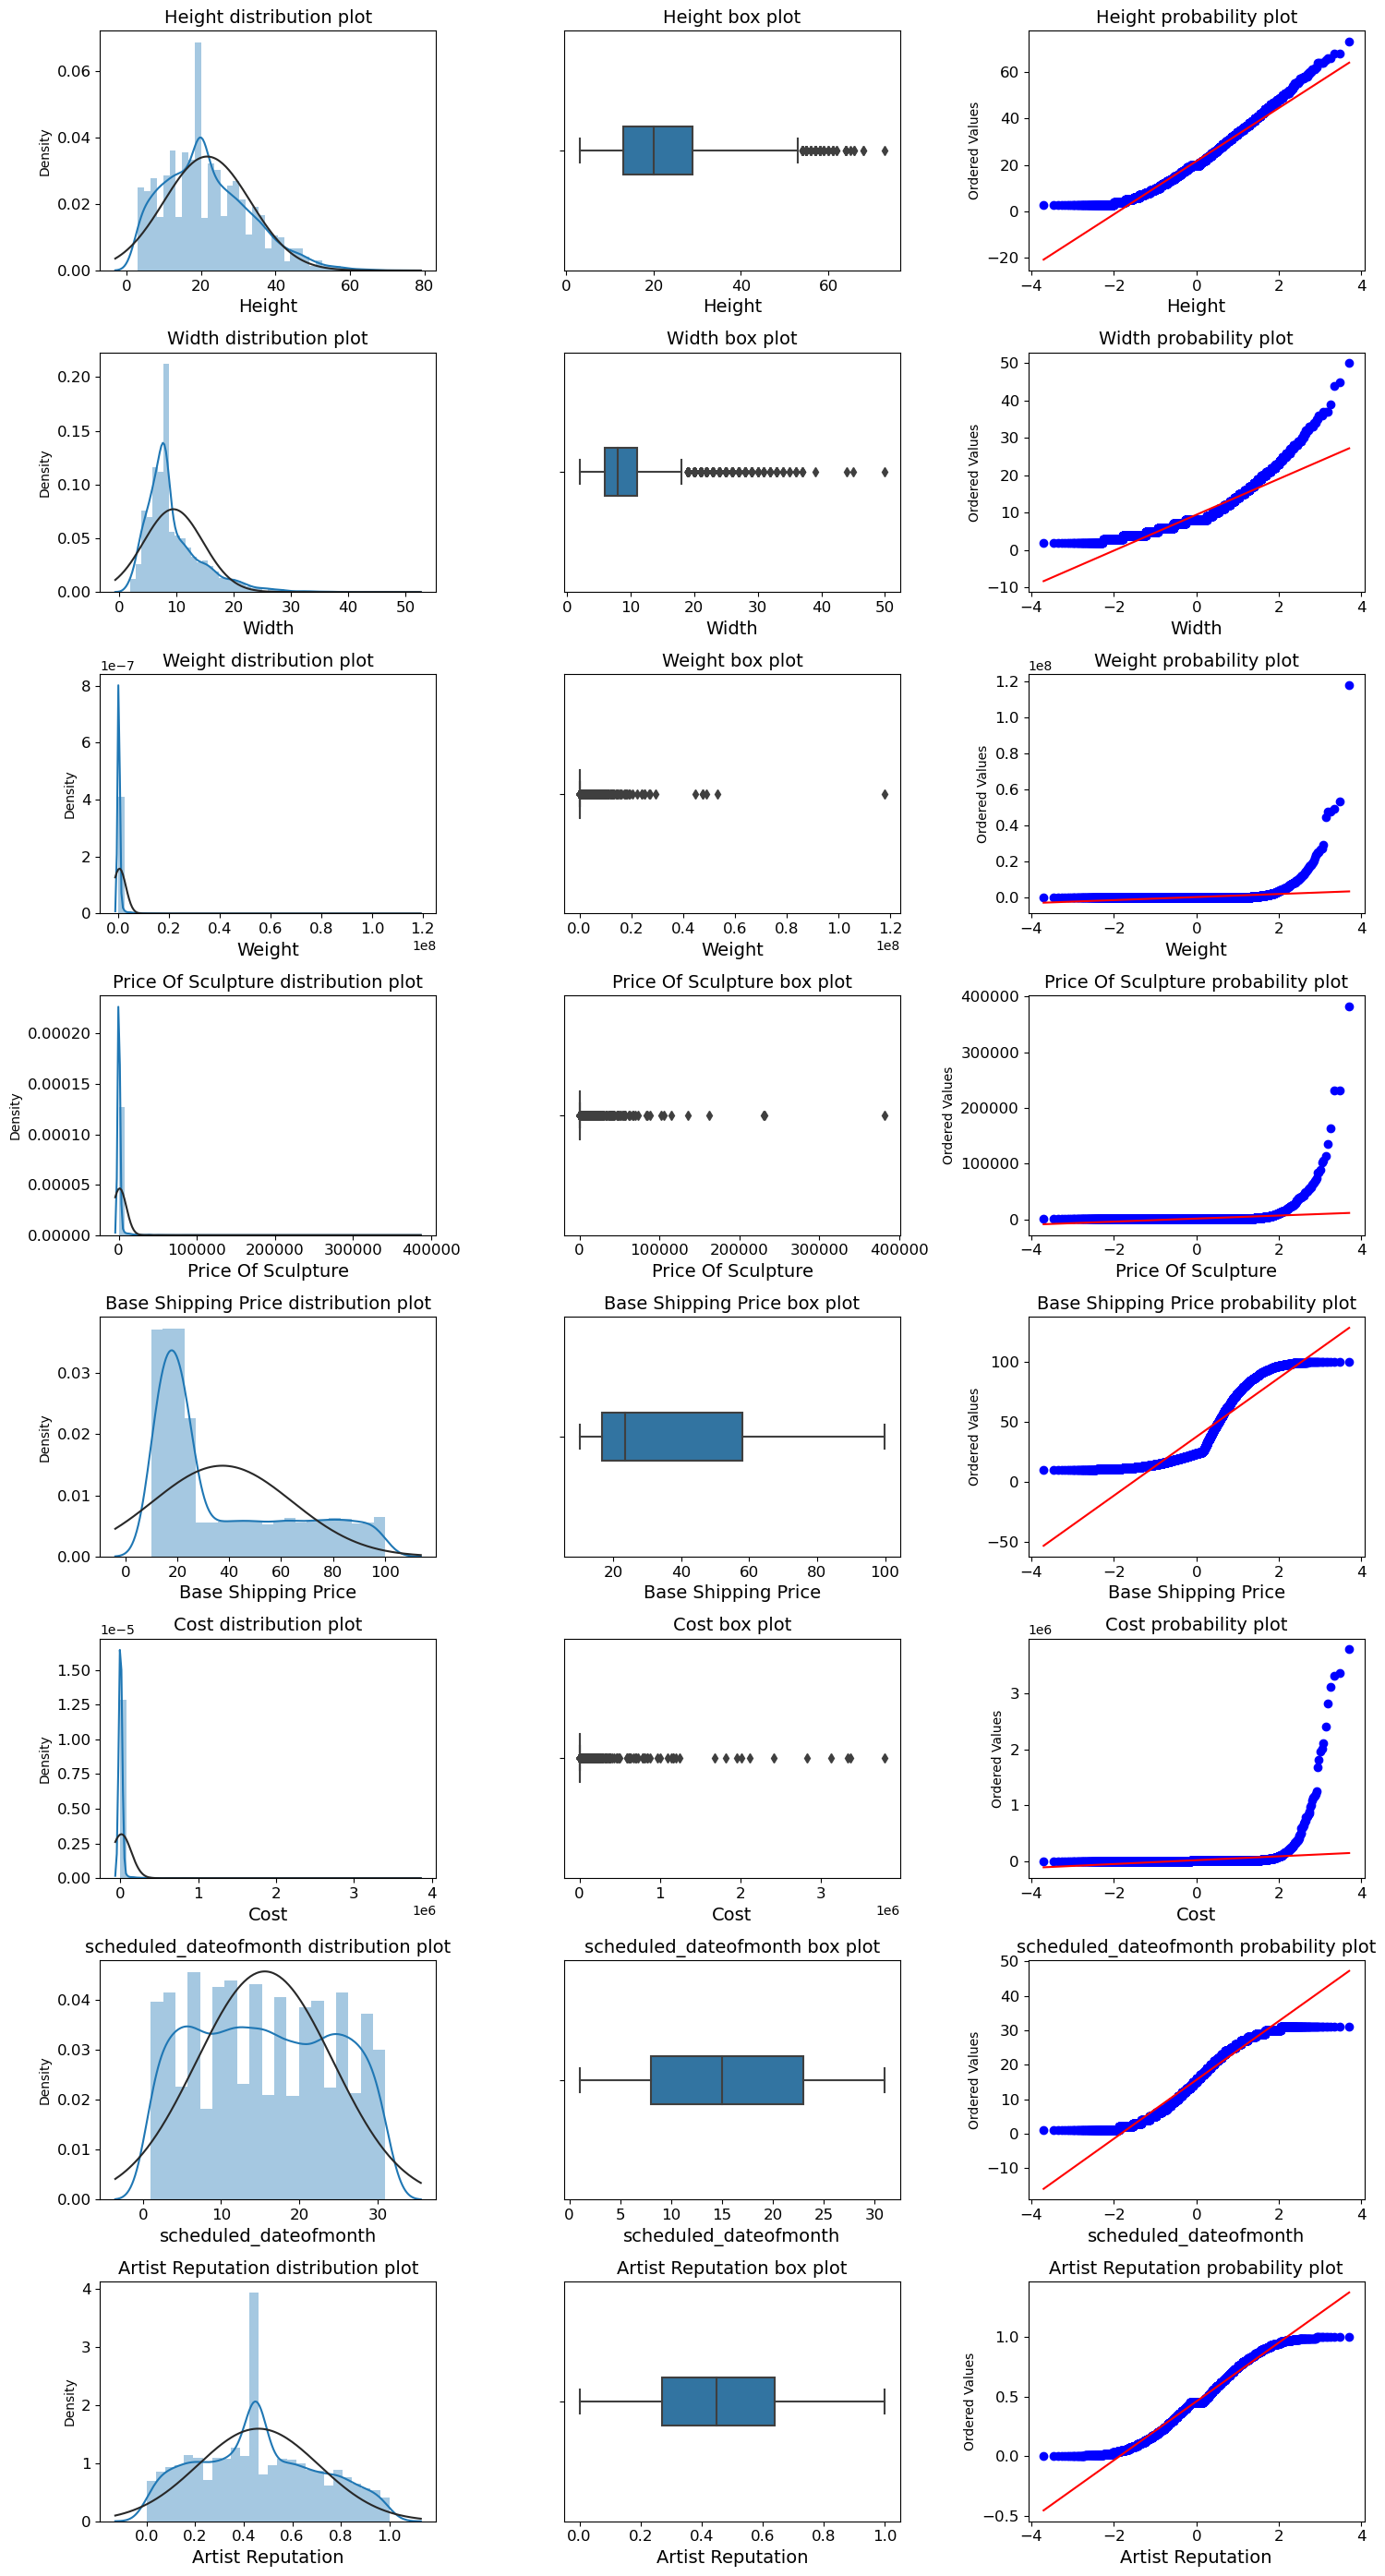

In [10]:
# plot distribution plots
dist_plots(shipping_data_clean, numericals)

    None of the above traits are regularly distributed, resulting in asymmetric, bell-shaped distribution charts (as opposed to how they would look like if they were normal - as shown by the black curve in each plot). The anticipated quantiles are not aligned with the probability graphs.

- Q-Q plot of schedule-date-of-month, artist reputation has smaller tails than a normal distribution.
- Cost, height, weight, width, price_of_sculpture and base_shipping_price are all right skewed.

#### Check scatterplot for any linear relationship

In [11]:
def subplot_scatterplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.regplot(y=dataframe.Cost, x=dataframe[column],ax=ax[i])
        ax[i].set_title(column,fontsize=14)

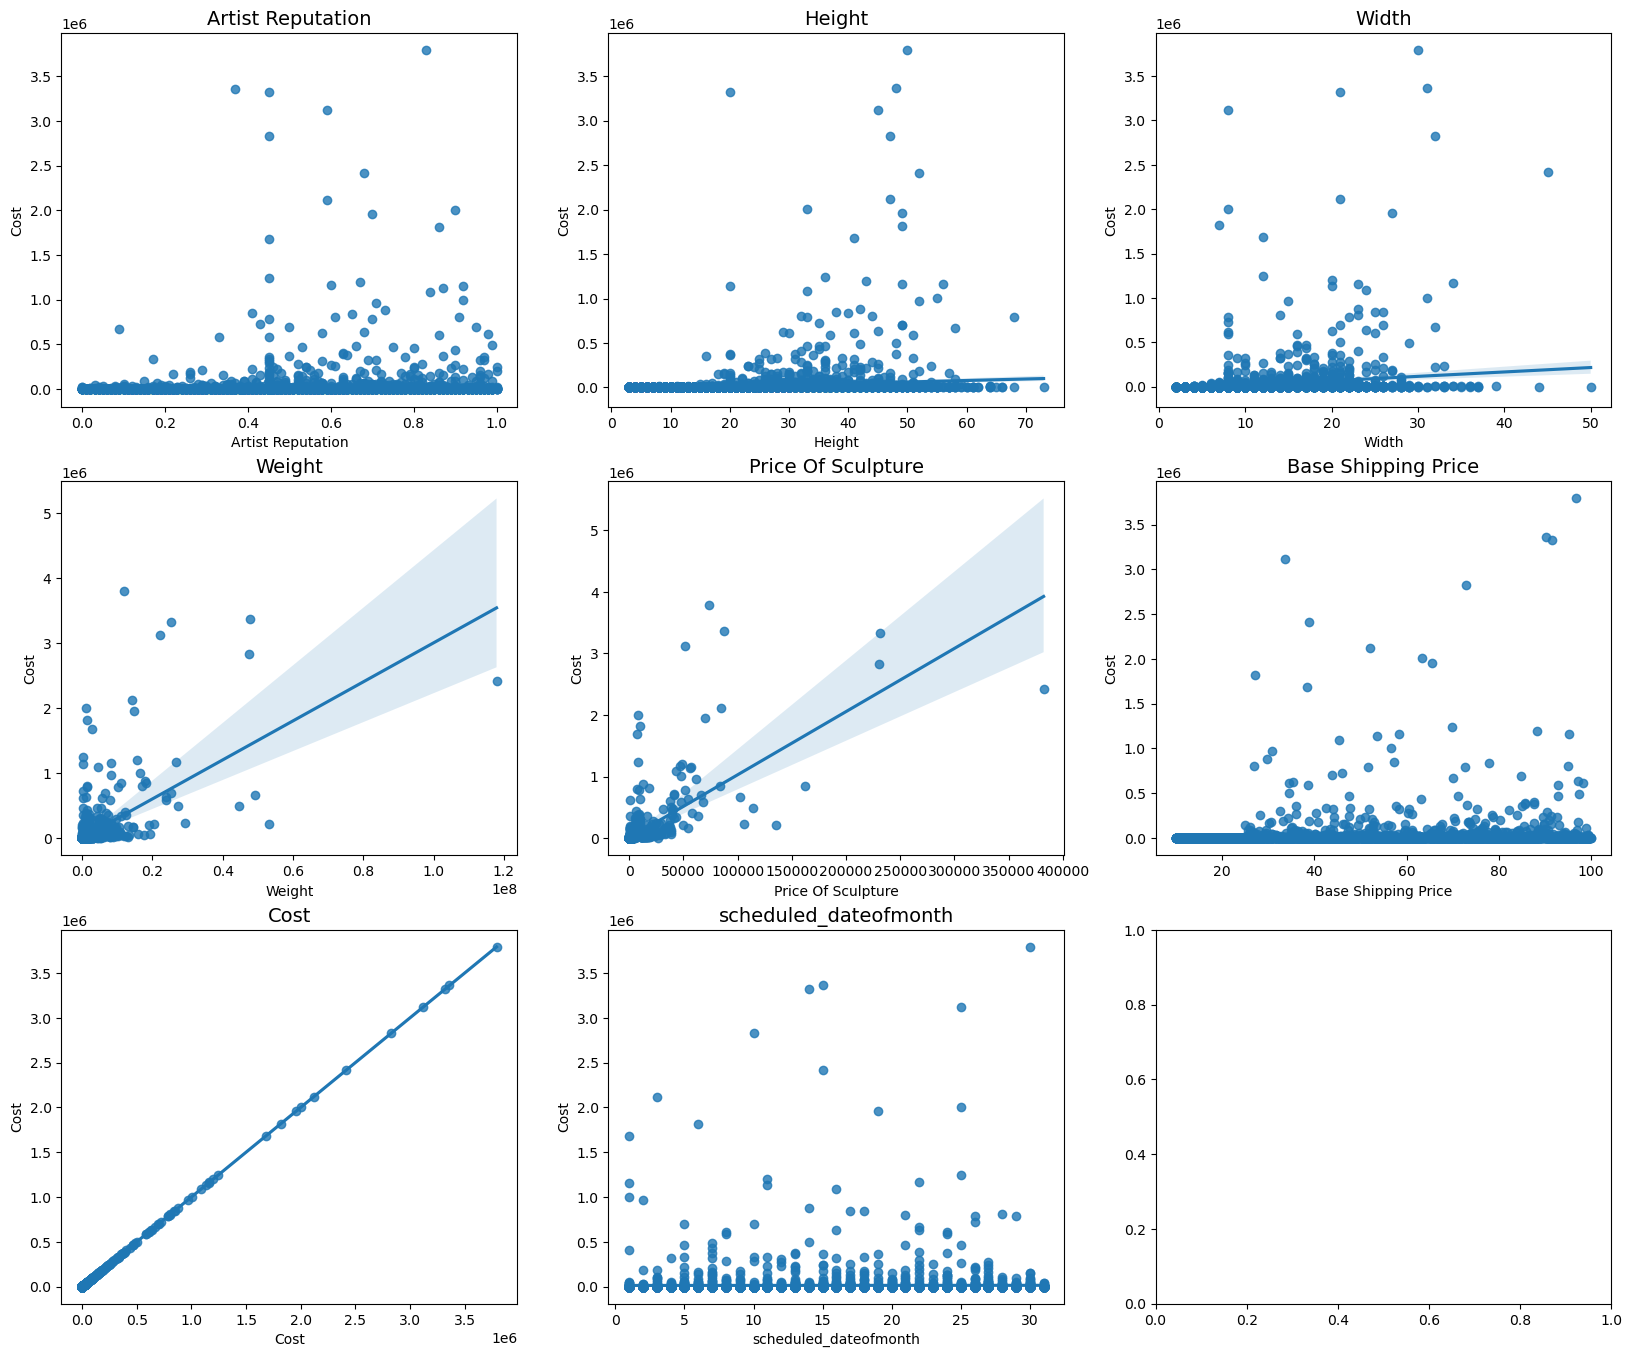

In [12]:
subplot_scatterplot(shipping_data_clean, numericals)

- No strong linear relationship observed.
- More outliers can be removed if linear regression were to be perform for future prediction. In general, this dataset was not suitable for linear regression with these outliers.

#### Histograms for Categorical Attributes

In [13]:
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=15)
        ax[i].set_title(f'{column} distribution',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()

In [14]:
#subplot_histograms(shipping_data_clean, categoricals[:-1])
categoricals

['Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'state']

- Most shipments were delivered as plan date. This can be seen from the 'delta' histogram where 0 has the highest frequency.
- Most sculptures buyers are working class at metropolis locations and they prefer to by sculptures that are not fragile (made of metal).
- Non-express roadways is most popular transportation mode within US. This shows the sculptures are actually non-essentials as no urgencies to receive them.
- Installation is also not requried.

#### Boxplots analysis for categorical features

In [15]:
def subplot_boxplot(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns))) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(15, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x = dataframe[column], y = dataframe['Cost'], width = 0.3, ax = ax[i])
        ax[i].set_title(column + " and cost price comparison")
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)
        # Set titles, labels, etc here for each subplot

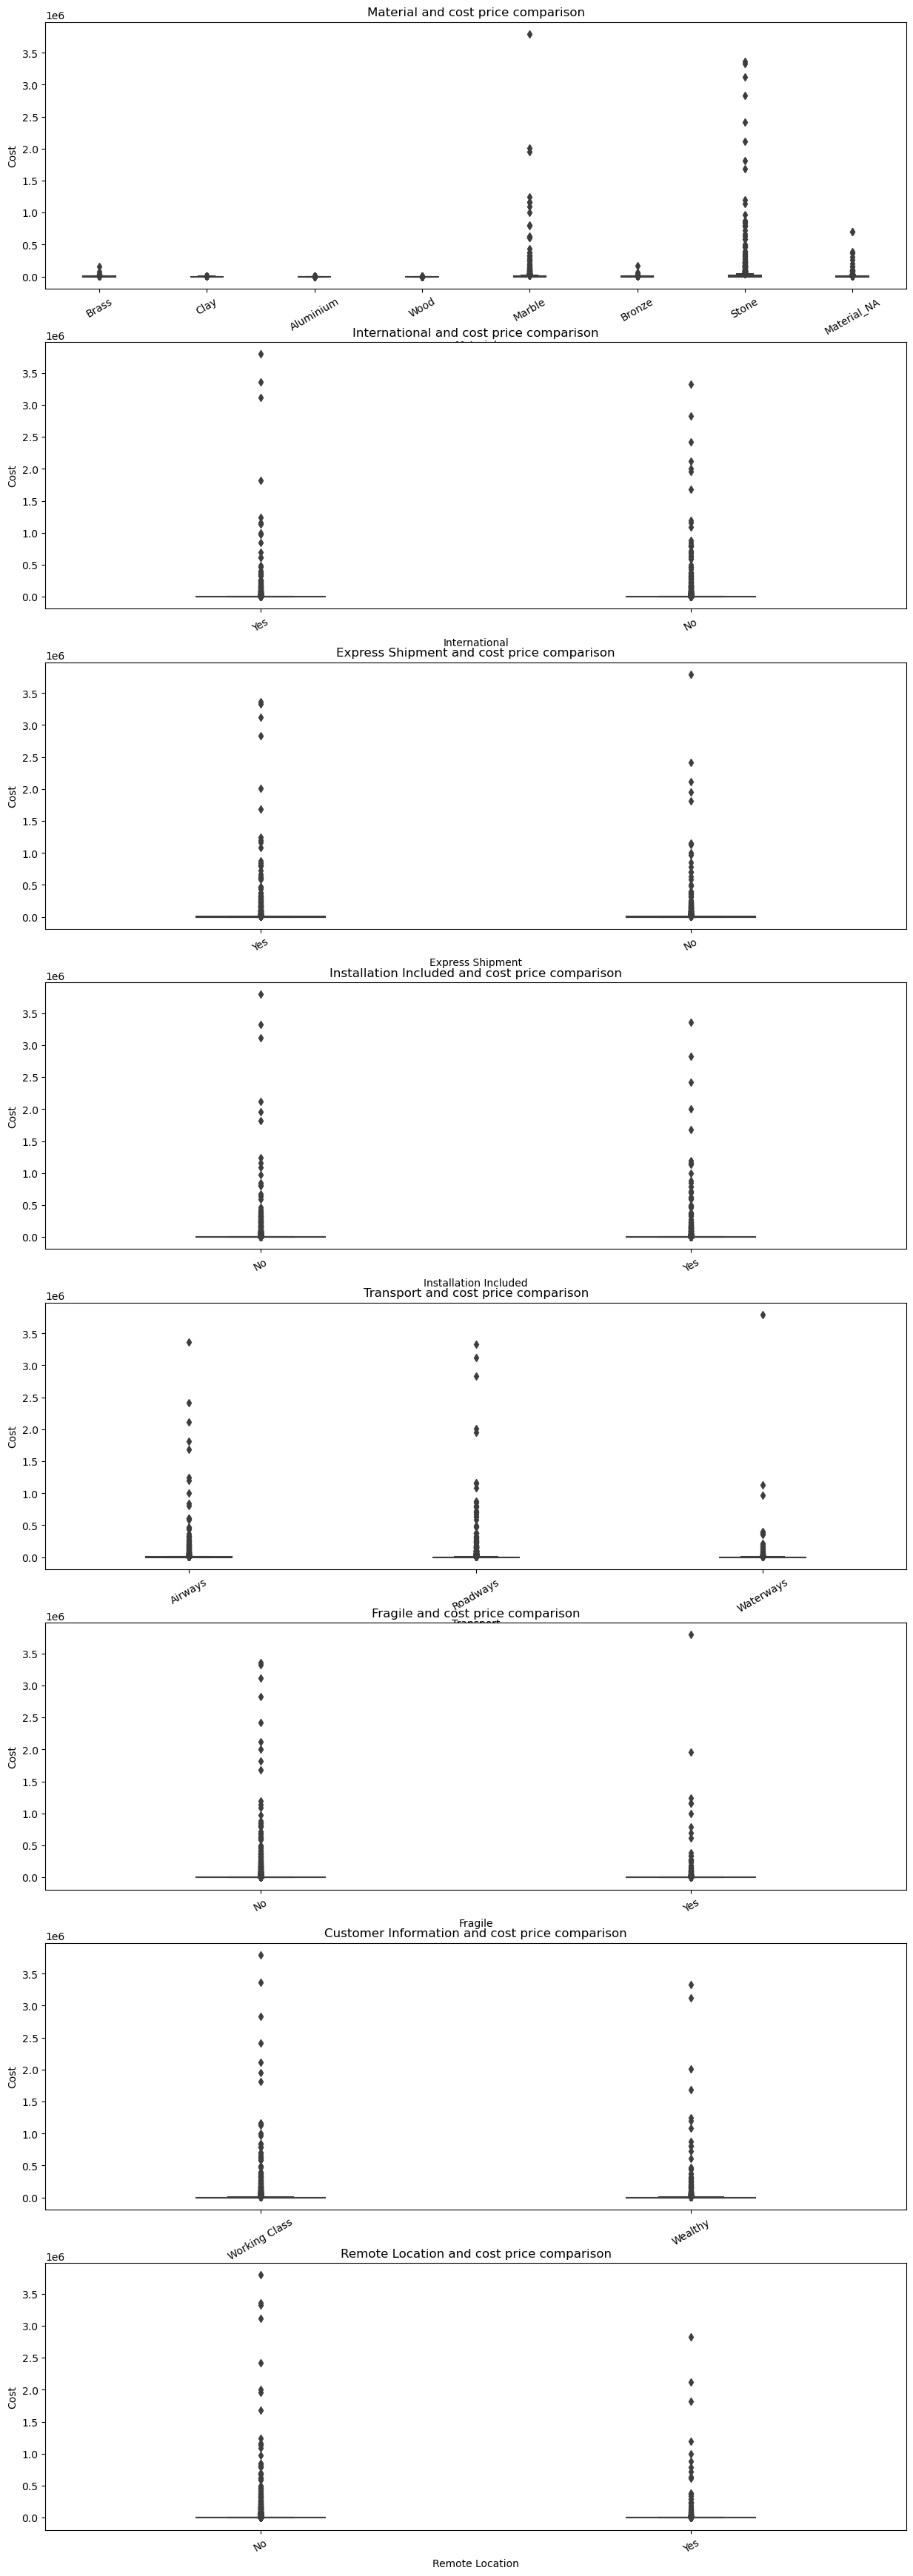

In [16]:
subplot_boxplot(shipping_data_clean, categoricals[:-1])

- Fragile, Stone and marble tend to be more expensive
- Many of these features eg 'installation_included', 'international' shows similar cost for its subclass

#### Key Observations

According to histograms, the majority of shipments were non-fragile sculptures delivered on schedule to middle-class customers in urban areas. The most utilized form of transportation in the US is non-express roads. This demonstrates how unnecessary the sculptures actually are. Furthermore, installation is not required. 


The correlation figure reveals that the price and weight of the sculpture were strongly connected with the transportation expense. 


Maryland, Kentucky, Wyoming, Utah, and New Hampshire had the highest median transportation costs, at 500 to 600, according to a choropleth map. Only Wyoming and Kentucky have high sculptural weight and price among these 5 states, though. 
    

This may suggest that geographic location may have an impact on shipping costs, and a forecast may be required to identify other variables.
    

It is clear from the scatterplots and probability plots that there are no linear correlations between the cost of shipping and any given attribute. Therefore, unless log or box cox transformation was used, the linear regression prediction model would not be appropriate.